In [0]:
import keras
import numpy as np

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd Colab\ Notebooks


[Errno 2] No such file or directory: 'Colab Notebooks'
/content


In [0]:
cd drive/'My Drive'

/content/drive/My Drive


In [0]:
data=np.load('data.npz')

In [0]:
labels=data['labels']

In [0]:
image_features=data['image_features']
text_features=data['text_features']
print(image_features.shape)
print(text_features.shape)
total_features=np.hstack((image_features,text_features))
print(total_features.shape)

(560, 16384)
(560, 5580)
(560, 21964)


In [0]:
#Image Features only
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

 
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(4000, input_dim=2048*8, activation='relu'))
    model.add(Dense(1250,activation='relu'))
    model.add(Dense(750,activation='relu'))
    model.add(Dense(250,activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=3, batch_size=5, verbose=1)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator,image_features, labels, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))







Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4000)              65540000  
_________________________________________________________________
dense_2 (Dense)              (None, 1250)              5001250   
_________________________________________________________________
dense_3 (Dense)              (None, 750)               938250    
_________________________________________________________________
dense_4 (Dense)              (None, 250)               187750    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2510      
Total params: 71,669,760
Trainable params: 71,669,760
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 

KeyboardInterrupt: ignored

In [0]:
#Text Features only
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

 
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(2500, input_dim=5580, activation='relu'))
    model.add(Dense(1250,activation='relu'))
    model.add(Dense(750,activation='relu'))
    model.add(Dense(250,activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=3, batch_size=5, verbose=1)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator,text_features, labels, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


In [0]:
#Text+Image Features 
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

 
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(4250, input_dim=(5580+2048*8),activation='relu'))
    model.add(Dense(2250,activation='relu'))
    model.add(Dense(1250,activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=3, batch_size=5, verbose=1)
kfold = KFold(n_splits=3, shuffle=True)
results = cross_val_score(estimator,total_features, labels, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


In [0]:
import numpy as np
from sklearn.manifold import TSNE

In [0]:

tsne = TSNE(n_components=2, random_state=0)

In [0]:
Image_2d = tsne.fit_transform(image_features)

In [0]:
Text_2d=tsne.fit_transform(text_features)

In [0]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i, c, label in zip(labels, colors, digits.target_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

(560, 2)


In [0]:
from sklearn import datasets
digits = datasets.load_digits()
# Take the first 500 data points: it's hard to see 1500 points
X = total_features
y = labels_max

In [0]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [0]:
X_2d = tsne.fit_transform(X)

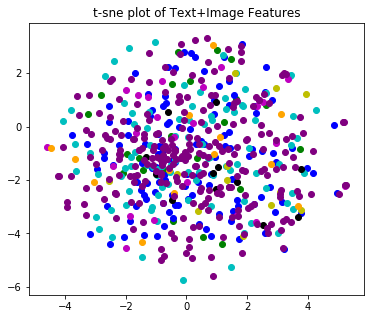

In [0]:
target_ids = range(len(digits.target_names))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i, c, label in zip(target_ids, colors,digits.target_names):
  plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=labels)
# plt.legend()

plt.title('t-sne plot of Text+Image Features')
plt.show()

In [0]:
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


In [0]:
labels_names=['Coffee Shop','Shop','Restaurent','Bank','Subway','Playfield','Theater','Bar','Hotel','Empty']

In [0]:
y = digits.target[:500]
print(X.shape,y.shape)

(560, 16384) (500,)


In [0]:
labels_max=np.zeros((560))
for i in range(560):
  labels_max[i]=np.argmax(labels[i,:])
  

In [0]:
np.unique(labels_max)

array([1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [0]:
pickle_in = open("target.pkl","rb")

In [0]:
target = pickle.load(pickle_in)

In [0]:
import pickle

In [0]:
print(len(target))

560


In [0]:
pickle_in = open("textrecog_autocomplete.pkl","rb")
textrecog_autocomplete= pickle.load(pickle_in)

In [0]:
pickle_in = open("textrecog_chars2vec_embedding.pkl","rb")
textrecog_chars2vec_embedding= pickle.load(pickle_in)

In [0]:
print(len(textrecog_chars2vec_embedding))

560


In [0]:
pickle_in = open("textrecog_decoded.pkl","rb")
textrecog_decoded= pickle.load(pickle_in)

In [0]:
print(len(textrecog_decoded))

560


In [0]:
print(textrecog_decoded)

[['cellars', 'spirits', 'iii', 'iii', 'irs', 'lid', 'adj', 'ky', 'ill', 'ul', 'xxxii', 'wa', 'n', 'cellars', '33', '31', '6'], ['spirits', 'cellars', 'flo', 'swine', 'calais', 'arline', 'colic', 'a', 'ahead', 'closed', 'opposite', 'please', 'sidewall', 'sloe', 'dice', 'use', 'cellar', 'tin', 'permute', 'tail', 'j', 'nfl', 'an', 'plait', 'vi'], ['va', 'ba', 'tint', 'livy', 'a11', 'bank', 't', 'a11', '83', 'laius', 'a', 'dew', '9', '111'], ['nsi', 'loaf', 'd', 'lxi', 'n', 'e', 'eh', 'dr', 't', 'jig', 'e', 'li', 't', '114', '8', 'h', 't', 't', 'il', 'ai', 'jr', 'cd'], ['ul', 'r', 'an', 'p', 'u', 'aa', '358', 't', 'len', '2', 'r', '9', 'a', '2', 'haas', 'lu', 'avior', 'mhz', 'lii', '311', 'j', 'lii', 'lu', 'aji'], ['rn', 'si', 'si', 'al', 'dj', 'rfd', 'g', 'c', 'r', 't', 'tv', 'i', 'il', 'iq', 'j', 'ir', '11', 'j', 'ifs', 'my', '3', 'tv', 'k'], ['til', 'r', 'r', 'til', 'xxix', 'iit', 't', 'o', 'jp', 'l', 'firm', '7', 'wt'], ['bee', 'j', 'iii', 'vs', 'iii', 't', 'ia', 't', 'a', 'ff', 'n', '

In [0]:
print(textrecog_chars2vec_embedding)

[array([[-5.28978825e-01,  2.61807501e-01,  1.37710288e-01, ...,
        -1.24444894e-01,  0.00000000e+00,  3.59788239e-01],
       [-2.43958697e-01,  5.08330107e-01, -2.97314256e-01, ...,
         4.30423081e-01,  5.12414728e-04,  6.63489401e-02],
       [-1.92060828e-01,  3.04532349e-01, -4.86095883e-02, ...,
        -1.48072585e-01,  3.08550205e-02,  3.59077230e-02],
       ...,
       [-5.29979169e-02, -2.64425091e-02, -1.69487186e-02, ...,
        -5.85102327e-02,  1.64024383e-02,  3.18344012e-02],
       [-6.05787672e-02, -3.53056192e-02,  1.62998997e-02, ...,
        -5.72641417e-02,  2.86575519e-02,  4.76384237e-02],
       [ 5.77998720e-02, -8.39365721e-02,  8.33089277e-03, ...,
        -4.41965014e-02, -2.25073677e-02, -3.01923882e-02]], dtype=float32), array([[-2.43958697e-01,  5.08330107e-01, -2.97314256e-01, ...,
         4.30423081e-01,  5.12414728e-04,  6.63489401e-02],
       [-5.28978825e-01,  2.61807501e-01,  1.37710288e-01, ...,
        -1.24444894e-01,  0.00000000e+